## **Clustering with Python**

### **Problem**
Clustering of iris flowers.

```Input: sepal length (cm),	sepal width (cm),	petal length (cm), and	petal width (cm)```

## Importing required libraries



In [ ]:
# Install libraries if required
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Importing the dataset

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Preparing the data

In [3]:
x = np.array(dataset)

## Finding optimum number of clusters with the elbow method

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e25a33750>,
                 k=None, metric=None, model=None, timings=True)

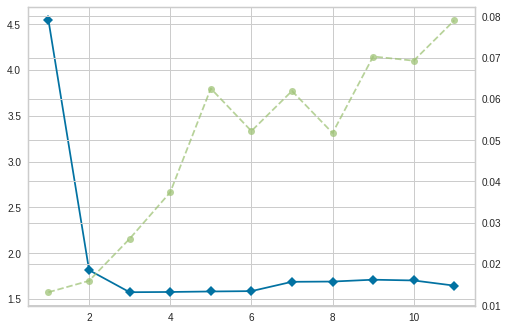

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(x)

The line chart resembles an arm, and the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. 

From this, we choose the number of clusters as **3**

## Creating a K-Means Classifier

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(x)

## Visualizing the clusters with the data points

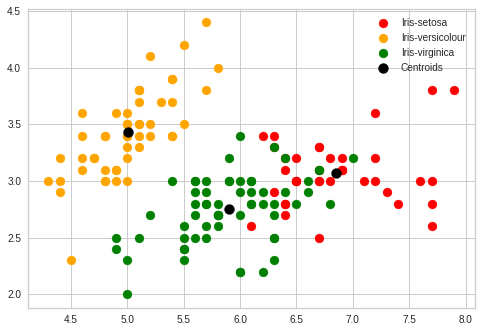

In [6]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()